In [3]:
import pandas as pd

tweets_df = pd.read_csv("tweets.csv", encoding = "ISO-8859-1")


In [6]:
tweets_df["text"].head()

0    RT @rssurjewala: Critical question: Was PayTM ...
1    RT @Hemant_80: Did you vote on #Demonetization...
2    RT @roshankar: Former FinSec, RBI Dy Governor,...
3    RT @ANI_news: Gurugram (Haryana): Post office ...
4    RT @satishacharya: Reddy Wedding! @mail_today ...
Name: text, dtype: object

In [11]:
from nltk.corpus import stopwords
import string
punctuation = string.punctuation
stopwords = stopwords.words("english")

def _clean(text):
    text = text.lower()
    text = "".join(x for x in text if x not in punctuation)
    
    words = text.split()
    words = [w for w in words if w not in stopwords]
    
    text = " ".join(words)
    return text

tweets_df["cleaned_text"] = tweets_df["text"].apply(_clean)

In [13]:
tweets_df[['text','cleaned_text']]

,text,cleaned_text
0,RT @rssurjewala: Critical question: Was PayTM ...,rt rssurjewala critical question paytm informe...
1,RT @Hemant_80: Did you vote on #Demonetization...,rt hemant80 vote demonetization modi survey app
2,"RT @roshankar: Former FinSec, RBI Dy Governor,...",rt roshankar former finsec rbi dy governor cbd...
3,RT @ANI_news: Gurugram (Haryana): Post office ...,rt aninews gurugram haryana post office employ...
4,RT @satishacharya: Reddy Wedding! @mail_today ...,rt satishacharya reddy wedding mailtoday carto...
...,...,...
14935,RT @saxenavishakha: Ghost of demonetization re...,rt saxenavishakha ghost demonetization returns...
14936,N d modi fans-d true nationalists of the count...,n modi fansd true nationalists country stil th...
14937,RT @bharat_builder: Lol. Demonetization has fi...,rt bharatbuilder lol demonetization fixed lot ...
14938,RT @Stupidosaur: @Vidyut B team of BJP. CIA ba...,rt stupidosaur vidyut b team bjp cia baby cctv...


In [14]:
from collections import Counter

complete_text = " ".join(tweets_df["cleaned_text"])
words = complete_text.split()
Counter(words).most_common(50)

[('demonetization', 13939),
 ('rt', 11059),
 ('india', 2766),
 ('modi', 2759),
 ('pm', 2729),
 ('narendra', 1566),
 ('rich', 1509),
 ('find', 1422),
 ('dear', 1411),
 ('implement', 1399),
 ('evanspiegel', 1389),
 ('actually', 1374),
 ('amp', 1302),
 ('urautelaforever', 1273),
 ('narendramodi', 1162),
 ('people', 1092),
 ('bank', 1029),
 ('rs', 740),
 ('impact', 701),
 ('cash', 697),
 ('lakh', 686),
 ('support', 684),
 ('terrorists', 658),
 ('youtube', 642),
 ('jampk', 638),
 ('since', 596),
 ('nation', 594),
 ('thats', 581),
 ('move', 553),
 ('third', 552),
 ('40', 550),
 ('looted', 547),
 ('incident', 547),
 ('kishtwar', 544),
 ('modibharosa', 543),
 ('gauravcsawant', 541),
 ('money', 512),
 ('question', 507),
 ('back', 499),
 ('across', 453),
 ('atms', 449),
 ('like', 442),
 ('says', 401),
 ('due', 401),
 ('supports', 393),
 ('goes', 376),
 ('paytm', 374),
 ('drkumarvishwas', 358),
 ('https', 354),
 ('oscar', 353)]

In [15]:
raw_text = " ".join(tweets_df['text'])
mentions = [w for w in raw_text.split() if w.startswith("@")]
Counter(mentions).most_common(50)

[('@evanspiegel', 1306),
 ('@URautelaForever:', 1273),
 ('@narendramodi', 1109),
 ('@gauravcsawant:', 541),
 ('@ModiBharosa:', 539),
 ('@DrKumarVishwas:', 350),
 ('@5Forty3:', 285),
 ('@rssurjewala:', 280),
 ('@rahulroushan:', 280),
 ('@PMOIndia', 237),
 ('@centerofright:', 237),
 ('@ShashiTharoor:', 210),
 ('@DasShaktikanta', 195),
 ('@steve_hanke:', 176),
 ('@ashu3page:', 170),
 ('@kanimozhi:', 152),
 ('@AskAnshul:', 149),
 ('@RoflGandhi_:', 147),
 ('@YouTube', 145),
 ('@Timcast:', 137),
 ('@Atheist_Krishna:', 133),
 ('@', 132),
 ('@ArvindKejriwal', 130),
 ('@Joydas:', 113),
 ('@arunjaitley', 112),
 ('@ippatel:', 110),
 ('@jamewils:', 105),
 ('@FinMinIndia', 104),
 ('@Joydeep_911:', 102),
 ('@attomeybharti:', 101),
 ('@PIB_India:', 97),
 ('@PiyushGoyalOffc:', 95),
 ('@Memeghnad', 84),
 ('@DrGPradhan:', 83),
 ('@priyaakulkarni2:', 80),
 ('@minimathur', 79),
 ('@MIB_India:', 79),
 ('@dna:', 76),
 ('@Ra_THORe:', 75),
 ('@pGurus1:', 74),
 ('@_MiteshPatel:', 73),
 ('@aaanupriyaaa:', 70),


In [17]:
raw_text = " ".join(tweets_df['text'])
hashtags = [w.lower() for w in raw_text.split() if w.startswith("#")]
hashtags = [w for w in raw_text.split() if "demo" not in w]
Counter(hashtags).most_common(50)

[('RT', 11053),
 ('to', 7650),
 ('is', 5152),
 ('in', 4491),
 ('the', 4331),
 ('of', 4053),
 ('#Demonetization', 3253),
 ('on', 2751),
 ('PM', 2384),
 ('Modi', 2379),
 ('India', 2243),
 ('and', 2220),
 ('a', 2180),
 ('that', 2168),
 ('out', 1729),
 ('for', 1672),
 ('so', 1599),
 ('had', 1598),
 ('who', 1591),
 ('Narendra', 1564),
 ('by', 1488),
 ('rich', 1477),
 ('find', 1421),
 ('Dear', 1407),
 ('implement', 1399),
 ('actually', 1370),
 ('have', 1315),
 ('@evanspiegel', 1306),
 ('&amp;', 1302),
 ('@URautelaForever:', 1273),
 ('from', 1123),
 ('@narendramodi', 1109),
 ('Demonetization', 1099),
 ('after', 992),
 ('people', 975),
 ('will', 906),
 ('has', 896),
 ('-', 862),
 ('was', 845),
 ('are', 789),
 ('The', 766),
 ('about', 760),
 ('with', 756),
 ('#DeMonetization', 742),
 ('how', 732),
 ('Rs', 709),
 ('bank', 701),
 ('such', 663),
 ('I', 658),
 ('support', 656)]

In [18]:
from nltk import ngrams
bigrams = ngrams(complete_text.split(),2)
Counter(bigrams).most_common(30)

[(('narendra', 'modi'), 1565),
 (('india', 'rich'), 1431),
 (('pm', 'narendra'), 1424),
 (('demonetization', 'find'), 1399),
 (('implement', 'demonetization'), 1397),
 (('rich', 'pm'), 1391),
 (('modi', 'implement'), 1376),
 (('evanspiegel', 'india'), 1371),
 (('dear', 'evanspiegel'), 1366),
 (('find', 'actually'), 1311),
 (('rt', 'urautelaforever'), 1273),
 (('urautelaforever', 'dear'), 1273),
 (('actually', 'rt'), 1024),
 (('pm', 'narendramodi'), 587),
 (('since', 'demonetization'), 572),
 (('demonetization', 'thats'), 546),
 (('lakh', 'looted'), 544),
 (('rs', '40'), 542),
 (('40', 'lakh'), 542),
 (('looted', 'bank'), 542),
 (('bank', 'kishtwar'), 542),
 (('kishtwar', 'jampk'), 542),
 (('jampk', 'third'), 542),
 (('third', 'incident'), 542),
 (('incident', 'since'), 542),
 (('thats', 'terrorists'), 542),
 (('rt', 'modibharosa'), 542),
 (('rt', 'gauravcsawant'), 541),
 (('gauravcsawant', 'rs'), 541),
 (('terrorists', 'rt'), 434)]

In [34]:
from nltk import word_tokenize, pos_tag, ne_chunk

for text in tweets_df["text"]:
    entities = ne_chunk(pos_tag(word_tokenize(text)))
    
    for entity in entities:
        if hasattr(entity,"label"):
            print(entity)

(ORGANIZATION PM/NNP)
(GPE Modi/NNP)
(ORGANIZATION RBI/NNP Dy/NNP)
(ORGANIZATION CBDT/NNP)
(PERSON Harvard/NNP Professor/NNP)
(PERSON Aam/NNP Aadmi/NNP)
(ORGANIZATION Haryana/NNP)
(PERSON Reddy/NNP Wedding/NNP)
(GPE Kishtwar/NNP)
(ORGANIZATION CorruptionFreeIndia/NNP)
(GPE National/NNP)
(GPE Narendra/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION Jaggesh2/NNP Bharat/NNP)
(ORGANIZATION Modi/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION RBI/NNP Dy/NNP)
(ORGANIZATION CBDT/NNP)
(PERSON Harvard/NNP Professor/NNP)
(PERSON Aam/NNP Aadmi/NNP)
(ORGANIZATION AFTER/NNP Gandhi/NNP)
(GPE Kerala/NNP)
(PERSON Kerala/NNP)
(ORGANIZATION Black/NNP Money/NNP)
(ORGANIZATION RBI/NNP Dy/NNP)
(ORGANIZATION CBDT/NNP)
(PERSON Harvard/NNP Professor/NNP)
(PERSON Aam/NNP Aadmi/NNP)
(GPE Modi/NNP)
(ORGANIZATION RBI/NNP Dy/NNP)
(ORGANIZATION CBDT/NNP)
(PERSON Harvard/NNP Professor/NNP)
(PERSON Aam/NNP Aadmi/NNP)
(ORGANIZATION AFTER/NNP Gandhi/NNP)
(GPE Modi/NNP)
(ORGANIZATION RBI/NNP Dy/NNP)
(ORGANIZAT

(PERSON Modi/NNP)
(ORGANIZATION PMModi/NNP)
(ORGANIZATION NotProCongress/NNP)
(GPE Kishtwar/NNP)
(PERSON Disaster/NNP)
(ORGANIZATION Modi/NNP)
(ORGANIZATION DeMonetization/NNP)
(GPE Kishtwar/NNP)
(ORGANIZATION JaiChandKejriwal/NNP)
(ORGANIZATION USELESS/NNP)
(ORGANIZATION PMOIndia/NNP)
(ORGANIZATION MeraDeshBadalRaha/NNP)
(PERSON Disaster/NNP)
(PERSON Disaster/NNP)
(PERSON Disaster/NNP)
(PERSON Disaster/NNP)
(PERSON Disaster/NNP)
(ORGANIZATION AFTER/NNP Gandhi/NNP)
(ORGANIZATION RajanAnandan/NNP)
(PERSON Disaster/NNP)
(ORGANIZATION CorruptionFreeIndia/NNP)
(ORGANIZATION AFTER/NNP Gandhi/NNP)
(GPE Modi/NNP)
(ORGANIZATION JaiChandKejriwal/NNP)
(ORGANIZATION USELESS/NNP)
(GPE Bhopal/NNP)
(ORGANIZATION ATMs/NNP)
(ORGANIZATION DeMonetization/NN)
(ORGANIZATION ArvindKejriwal/NNP)
(ORGANIZATION TimesNow/NNP)
(GPE World/NNP)
(GPE Kishtwar/NNP)
(ORGANIZATION Demonetization/NNP)
(PERSON Pain/NN)
(GPE India/NNP)
(GPE Kishtwar/NNP)
(GPE Kishtwar/NNP)
(ORGANIZATION AFTER/NNP Gandhi/NNP)
(ORGANIZATI

(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION Commitment/NNP)
(ORGANIZATION Blackmoney/NNP)
(ORGANIZATION PM/NNP)
(PERSON Move/NNP)
(ORGANIZATION AFTER/NNP Gandhi/NNP)
(GPE Modi/NNP)
(ORGANIZATION AFTER/NNP Gandhi/NNP)
(ORGANIZATION AFTER/NNP Gandhi/NNP)
(ORGANIZATION Opposition/NNP)
(ORGANIZATION Parliame/NN)
(GPE Modi/NNP)
(ORGANIZATION Modi/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION PMOIndia/NNP)
(ORGANIZATION MeraDeshBadalRaha/NNP)
(ORGANIZATION AFTER/NNP Gandhi/NNP)
(GPE Modi/NNP)
(ORGANIZATION Opposition/NNP)
(ORGANIZATION Parliame/NN)
(ORGANIZATION PMOIndia/NNP)
(ORGANIZATION MeraDeshBadalRaha/NNP)
(ORGANIZATION APP/NNP)
(ORGANIZATION DeMonetization/NNP)
(PERSON Please/NNP)
(ORGANIZATION AFTER/NNP Gandhi/NNP)
(ORGANIZATION Real/JJ Currency/NNP)
(GPE Modi/NNP)
(ORGANIZATION Modi/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION AFTER/NNP Gandhi/NNP)
(ORGANIZATION BJP/NNP Parliamenta/NNP)
(PERSON Pappu/NNP)
(PERSON Modi/NNP)
(ORGANIZATION RBI/NNP)
(ORGANIZATION AFTE

(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION DeMonetisation/NNP)
(ORGANIZATION Modi/NNP)
(ORGANIZATION DeMonetization/NNP)
(GPE Modi/NNP)
(GPE Indians/NNPS)
(GPE Indians/NNPS)
(ORGANIZATION CorruptionFreeIndia/NNP)
(PERSON Dear/NNP)
(ORGANIZATION COMMON/NNP)
(GPE D/NNP)
(PERSON Left/NNP)
(GPE Long/NNP)
(ORGANIZATION Country/NNP)
(ORGANIZATION NPA/NNP)
(ORGANIZATION APP/NNP)
(ORGANIZATION DeMonetization/NNP)
(PERSON Please/NNP)
(ORGANIZATION PM/NNP)
(PERSON Move/NNP)
(GPE Modi/NNP)
(ORGANIZATION CorruptionFreeIndia/NNP)
(ORGANIZATION DeMonetisation/NNP)
(PERSON Bhakts/NNP)
(ORGANIZATION DeMonetization/NNP)
(GPE Indore/NN)
(ORGANIZATION PM/NNP)
(PERSON Move/NNP)
(ORGANIZATION DEMONETISATION/NNP)
(ORGANIZATION DEMONETIZATION/NNP)
(ORGANIZATION DEMONETISATION/NNP)
(ORGANIZATION DEMONETIZATION/NNP)
(ORGANIZATION WhatsTheDealModiJi/NNP)
(ORGANIZATION MediaCooks/NNP)
(ORGANIZATION APP/NNP)
(ORGANIZATION DeMonetization/NNP)
(PERSON Please/NNP)
(ORGANIZATION

(GPE Kishtwar/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION Commitment/NNP)
(ORGANIZATION Blackmoney/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION Commitment/NNP)
(ORGANIZATION Blackmoney/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION Commitment/NNP)
(ORGANIZATION Blackmoney/NNP)
(ORGANIZATION DeMonetization/NN)
(ORGANIZATION SitaramYechury/NNP Continue/NNP)
(GPE Bengal/NNP)
(PERSON Salaam/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION TMC/NNP)
(PERSON Mamta/NNP Di/NNP)
(GPE WB/NNP)
(PERSON Bengal/NNP Did/NNP)
(PERSON Mam/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION TMC/NNP)
(PERSON Mamta/NNP Di/NNP)
(GPE WB/NNP)
(PERSON Bengal/NNP Did/NNP)
(PERSON Mam/NNP)
(ORGANIZATION DeMonetisation/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION Commitment/NNP)
(ORGANIZATION Blackmoney/NNP)
(ORGANIZATION DeMonetization/NN)
(ORGANIZATION DeMonetization/NNP)
(PERSON Against/NNP Govts/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION MUDR

(ORGANIZATION Modi/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION PMModi/NNP Take/NNP Part/NNP)
(GPE Survey/NNP)
(ORGANIZATION NMApp/NNP)
(ORGANIZATION Part/NNP)
(ORGANIZATION Nation/NNP)
(ORGANIZATION PMModi/NNP Take/NNP Part/NNP)
(GPE Survey/NNP)
(ORGANIZATION NMApp/NNP)
(ORGANIZATION Part/NNP)
(ORGANIZATION Nation/NNP)
(GPE Naxalites/NNP)
(GPE Mafias/NNP)
(PERSON Black/NNP Money/NNP)
(ORGANIZATION ISI/NNP Agents/NNP)
(ORGANIZATION DALAL/NNP)
(GPE Kishtwar/NNP)
(ORGANIZATION TOI/NNP)
(PERSON Startups/NNP)
(ORGANIZATION FinTech/NNP)
(PERSON Jan/NNP Dhan/NNP)
(ORGANIZATION Congress/NNP)
(ORGANIZATION CorruptionCle/NNP)
(GPE India/NNP)
(ORGANIZATION Gives/NNP)
(ORGANIZATION Modi/NNP)
(ORGANIZATION DeMonetization/NN)
(GPE Kishtwar/NNP)
(PERSON Bigger/NNP)
(ORGANIZATION Real/NNP Estate/NNP)
(GSP Consumption/NNP)
(GPE Banks/NNP)
(ORGANIZATION SBI/NN)
(PERSON Smt/NNP)
(PERSON Arundhati/NNP Bhattacharya/NNP)
(GPE Narendra/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION PMModi/NNP 

(ORGANIZATION BREAKING/NNP)
(GPE Narendra/NNP)
(ORGANIZATION DeMonetization/NNP)
(PERSON Advisor/NNP Lawyer/NNP Designer/NNP)
(ORGANIZATION MUDRA/NNP)
(PERSON Vijay/NNP Mallya/NNP)
(ORGANIZATION CREDAI/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION RatanTata/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(ORGANIZATION MalikAshok/NNP)
(ORGANIZATION PM/NNP Modi/NNP)
(ORGANIZATION PM/NNP)
(PERSON Move/NNP)
(PERSON Modi/NNP App/NNP)
(ORGANIZATION HinduRajyam/NNP)
(ORGANIZATION PM/NNP)
(PERSON Move/NNP)
(PERSON Delhi/NNP)
(ORGANIZATION SamajwadiParty/NNP)
(ORGANIZATION Jaya/NNP Bachchan/NNP)
(ORGANIZATION TMC/NNP)
(ORGANIZATION Jantar/NNP Mantar/NNP)
(GPE Kishtwar/NNP)
(ORGANIZATION PM/NNP)
(PERSON Move/NNP)
(ORGANIZATION BREAKING/NNP)
(ORGANIZATION NEWS/NNP)
(GPE Kishtwar/NNP)
(GPE Narendra/NNP)
(ORGANIZATION DeMonetization/NNP)
(GPE Kishtwar/NNP)
(GPE Narendra/NNP)
(ORGANIZATION DeMonetization/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Polit

(ORGANIZATION ACTIVITY/NNP)
(ORGANIZATION DEMONETIZATION/NNP)
(ORGANIZATION DeMonetization/NNP)
(PERSON Lord/NNP)
(PERSON Behen/NNP Bagwati/NNP)
(ORGANIZATION LOT/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION PM/NNP)
(PERSON Move/NNP)
(ORGANIZATION JanKiBaat/NNP)
(ORGANIZATION DEMONETIZATION/NNP)
(ORGANIZATION PM/NNP)
(PERSON Move/NNP)
(ORGANIZATION PM/NNP)
(PERSON Vijay/NNP Mallya/NNP)
(ORGANIZATION PM/NNP)
(PERSON Move/NNP)
(GPE Kishtwar/NNP)
(PERSON Urban/NNP)
(ORGANIZATION Vallagers/NNS)
(ORGANIZATION Villagers/NNP)
(ORGANIZATION NDTV/NNP)
(ORGANIZATION BlackMoney/NNP)
(GPE Kishtwar/NNP)
(ORGANIZATION Opposition/NNP)
(ORGANIZATION Parliame/NN)
(GPE Kishtwar/NNP)
(GPE India/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(PERSON Anna/NNP Hazare/NNP)
(ORGANIZATION KashmirUnrest/NNP)
(ORGANIZATION PM/NNP)
(PERSON Move/NNP)
(ORGANIZATION LS/NNP)
(ORGANIZATION BJP/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANI

(PERSON Babus/NNP)
(GPE Politicians/NNP)
(PERSON Govt/NNP Employees/NNP)
(ORGANIZATION PM/NNP)
(GPE Kishtwar/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION JanKiBaat/NNP)
(ORGANIZATION DEMONETIZATION/NNP)
(PERSON Game/NNP Set/NNP)
(GPE Match/NNP)
(ORGANIZATION PM/NNP Modi/NNP)
(ORGANIZATION PMOIndia/NNP)
(ORGANIZATION RBI/NNP Dear/NNP Sir/NNP)
(GPE Please/NNP)
(GPE Kishtwar/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(PERSON Narendra/NNP Modi/NNP)
(ORGANIZATION YSRCP/NN Chief/NNP)
(PERSON Mohan/NNP Reddy/NNP)
(ORGANIZATION YSJagan/NNP)
(ORGANIZATION NCBN/NNP)
(ORGANIZATION HPCL/NNP)
(ORGANIZATION Chennai/NNP)
(ORGANIZATION PM/NNP)
(GPE India/NNP)
(PERSON Modi/NNP Did/NNP)
(ORGANIZATION PMModi/NNP Take/NNP Part/NNP)
(GPE Survey/NNP)
(ORGANIZATION NMApp/NNP)
(ORGANIZATION Part/NNP)
(ORGANIZATION Nation/NNP)
(ORGANIZATION Demonetization/NNP)
(PERSON Impact/NNP)
(GPE India/NNP)
(PERSON Pankaj/NNP Renjhen/NNP)


(GPE Kishtwar/NNP)
(PERSON Parlmnt/NNP)
(ORGANIZATION Opposition/NNP)
(ORGANIZATION Parliame/NN)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION CITIZENS/NNP)
(ORGANIZATION SUD/NNP)
(ORGANIZATION TOP/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION YSRCP/NN Chief/NNP)
(PERSON Mohan/NNP Reddy/NNP)
(ORGANIZATION YSJagan/NNP)
(ORGANIZATION NCBN/NNP)
(ORGANIZATION DeMonetization/NNP)
(GPE Indians/NNPS)
(PERSON Twitter/NNP)
(GPE Kishtwar/NNP)
(GPE Kishtwar/NNP)
(ORGANIZATION DeMonetization/NNP)
(GPE Indians/NNPS)
(ORGANIZATION JanKiBaat/NNP)
(PERSON Washerman/NNP Sonu/NNP)
(ORGANIZATION DEMONETIZATION/NNP)
(PERSON Amar/NNP Singh/NNP)
(ORGANIZATION PM/NNP)
(PERSON Move/NNP)
(ORGANIZATION PM/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION DeMonetization/NNP)
(PERSON Jaya/NNP Bachchan/NNP)
(PERSON Mamata/NNP)
(ORGANIZATION Jantar/NNP Mantar/NNP)
(PERSON Panama/NNP Papers/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION CorruptionFreeIndia/NN

(GPE India/NNP)
(ORGANIZATION VERB/NNP)
(PERSON Karo/NNP)
(PERSON Welcome/NNP)
(GPE Anti/NNP)
(PERSON True/JJ)
(GPE India/NNP)
(ORGANIZATION BJP/NNP)
(PERSON Manankmr/NNP)
(ORGANIZATION PM/NNP)
(PERSON Move/NNP)
(ORGANIZATION PM/NNP)
(PERSON Move/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(PERSON Modi/NNP)
(ORGANIZATION NarendraModii/NNP)
(PERSON Move/NNP)
(PERSON Kejriwal/NNP)
(GPE Kishtwar/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION ATMs/NNP)
(PERSON Dettol/NNP)
(ORGANIZATION ATM/NNP)
(GPE Kishtwar/NNP)
(ORGANIZATION RatanTata/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(PERSON Modi/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION NarendraModii/NNP)
(PERSON Move/NNP)
(ORGANIZATION LS/NNP)
(ORGANIZATION BJP/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION DeMonetization/NNP)
(PERSON Modi/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(PERSON Nation/NNP)
(PE

(ORGANIZATION CorruptionFreeIndia/NNP)
(ORGANIZATION PM/NNP)
(PERSON Move/NNP)
(ORGANIZATION PM/NNP)
(PERSON Move/NNP)
(GPE Kishtwar/NNP)
(ORGANIZATION Opposition/NNP)
(ORGANIZATION Parliame/NN)
(ORGANIZATION BJP/NNP)
(GPE Kishtwar/NNP)
(GPE Gujarat/NNP)
(ORGANIZATION PM/NNP)
(PERSON Move/NNP)
(PERSON Jayamohan/NNP)
(PERSON Less/NNP)
(ORGANIZATION CorruptionFreeIndia/NNP)
(PERSON Mini/NNP ATMs/NNP)
(GPE Hinterland/NNP)
(ORGANIZATION IndiaKaDil/NNP)
(PERSON Sonada/NNP)
(GPE Kishtwar/NNP)
(PERSON Steps/NNP)
(PERSON Citizens/NNP Fight/NNP)
(ORGANIZATION Cash/NNP Crunch/NNP)
(ORGANIZATION NorthEast/NNP)
(ORGANIZATION NorthEast/NNP)
(ORGANIZATION NorthEast/NNP)
(GPE Gorkhaland/NNP)
(ORGANIZATION NorthEast/NNP)
(ORGANIZATION NorthEast/NNP)
(ORGANIZATION NorthEast/NNP)
(ORGANIZATION Citizen/NNP)
(ORGANIZATION NorthEast/NNP)
(ORGANIZATION PMOIndia/NNP)
(ORGANIZATION NorthEast/NNP)
(GPE Kalimpong/NNP)
(ORGANIZATION NorthEast/NNP)
(ORGANIZATION NorthEast/NNP)
(GPE Kishtwar/NNP)
(ORGANIZATION Cor

(PERSON Govt/NNP)
(PERSON Shivpal/JJ Singh/NNP Yadav/NNP)
(PERSON Samajwadi/NNP)
(ORGANIZATION Party/NNP)
(ORGANIZATION Jaya/NNP Bachchan/NNP)
(ORGANIZATION AAP/NNP)
(ORGANIZATION TMC/NNP)
(ORGANIZATION Jantar/NNP Mantar/NNP)
(GPE Odisha/NNP)
(ORGANIZATION CMO_Odisha/NNP)
(PERSON Follow/NNP)
(GPE Public/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION PM/NNP)
(PERSON Move/NNP)
(GPE Kishtwar/NNP)
(ORGANIZATION PM/NNP)
(PERSON Move/NNP)
(ORGANIZATION PM/NNP)
(PERSON Move/NNP)
(ORGANIZATION PM/NNP)
(PERSON Move/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(ORGANIZATION PM/NNP)
(PERSON Move/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(GPE Kishtwar/NNP)
(ORGANIZATION PM/NNP)
(PERSON Move/NNP)
(ORGANIZATION PM/NNP)
(PERSON Move/NNP)
(ORGANIZATION PM/NNP)
(PERSON Move/NNP)
(ORGANIZATION PM/NNP)
(PERSON Move/NNP)
(ORGANIZATION PM/NNP)
(PERSON Move/NNP)
(PERSON Mini/NNP ATMs/NNP)
(GPE Hinterland/NNP)
(ORGANIZATION 

(GPE Kishtwar/NNP)
(ORGANIZATION Real/JJ Currency/NNP)
(ORGANIZATION JhaSanjay/NNP)
(PERSON Let/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION RatanTata/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(ORGANIZATION IndiaKaDil/NNP)
(ORGANIZATION RBI/NNP)
(ORGANIZATION NSEL/NNP)
(GPE Kishtwar/NNP)
(GPE Kishtwar/NNP)
(PERSON Per/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION DEA/NNP)
(GPE Kishtwar/NNP)
(ORGANIZATION DeMonetization/NNP)
(PERSON Lines/NNS)
(ORGANIZATION ATMs/NNP)
(ORGANIZATION RBI/NNP)
(ORGANIZATION NSEL/NNP)
(ORGANIZATION DEA/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(PERSON Parlmnt/NNP)
(GPE Kishtwar/NNP)
(GPE Kishtwar/NNP)
(ORGANIZATION Opposition/NNP)
(ORGANIZATION Parliame/NN)
(PERSON Pratap/NNP Bhanu/NNP Mehta/NNP)
(ORGANIZATION PBM/NNP)
(ORGANIZATION DeMonetization/NNP)
(PERSON Lines/NNS)
(ORGANIZATION ATMs/NNP)
(GPE Kishtwar/NNP)
(GPE Kishtwar/NNP)
(PERSON Dalits/NNP)
(GPE Kishtwar/NNP)
(GPE Narendra/NNP)
(ORGANIZATION D

(GPE Rahul/NNP)
(GPE Modi/NNP)
(PERSON Jaitley/NNP)
(GPE Rahul/NNP)
(GPE Modi/NNP)
(PERSON Jaitley/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION RatanTata/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE Kishtwar/NNP)
(GPE Unable/JJ)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION Opposition/NNP)
(ORGANIZATION Parliame/NN)
(ORGANIZATION DeMonetization/NNP)
(GPE Indians/NNPS)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION DeMonetization/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(PERSON Airtel/NNP)
(PERSON Mamta/NNP)
(PERSON Govt/NNP)
(PERSON Hard/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION DeMonetization/NNP)
(PERSON Lines/NNS)
(ORGANIZATION ATMs/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION RatanTata/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(ORGANIZATION DeMonetization/NNP)

(ORGANIZATION DeMonetization/NNP)
(PERSON Govt/NNP)
(PERSON Trxns/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION Entrepreneural/JJ Abilities/NNPS)
(ORGANIZATION DigitalIndia/NNP)
(ORGANIZATION CashlessSociety/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION ATMs/NNP)
(ORGANIZATION DeMonetization/NNP)
(PERSON Trxns/NNP)
(ORGANIZATION DeMonetization/NNP)
(GPE Govt/NNP)
(GPE Central/NNP)
(PERSON Telangana/NNP)
(ORGANIZATION DeMonetization/NNP)
(PERSON Lines/NNS)
(ORGANIZATION ATMs/NNP)
(PERSON Per/NNP)
(PERSON Dire/NNP)
(ORGANIZATION ATMs/NNP)
(ORGANIZATION DeMonetization/NNP)
(PERSON Trxns/NNP)
(PERSON Smaller/NN Showrooms/NNP)
(ORGANIZATION Demonetization/NNP)
(GPE Boon/NN)
(GPE Disguise/NNP)
(ORGANIZATION REALTORS/NNP)
(ORGANIZATION RatanTata/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(ORGANIZATION Opposition/NNP)
(ORGANIZATION Parliame/NN)
(ORGANIZATION DeMonetization/NNP)
(PERSON Trxns/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(GPE Central/N

(PERSON Vijay/NNP Mallya/NNP)
(GPE India/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(GPE Gujarat/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION MVenkaiahNaidu/NNP)
(ORGANIZATION Parliament/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(ORGANIZATION MVenkaiahNaidu/NNP)
(ORGANIZATION Parliament/NNP)
(GPE Kishtwar/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION Parliament/NNP)
(GPE Gujarat/NNP)
(ORGANIZATION MVenkaiahNaidu/NNP)
(ORGANIZATION Parliament/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(GPE Kishtwar/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION Parliament/NNP)
(PERSON Parlmnt/NNP)
(GPE Kishtwar/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(GPE Kishtwar/NNP)
(PERSON L

(GPE Kishtwar/NNP)
(GPE Brilliant/NNP)
(PERSON Modi/NNP)
(PERSON Parlmnt/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(PERSON Cash/NNP)
(PERSON Holy/NNP Cow/NNP)
(ORGANIZATION RaGa/NNP)
(GPE Kishtwar/NNP)
(GPE Kishtwar/NNP)
(GPE Kishtwar/NNP)
(GPE Kishtwar/NNP)
(ORGANIZATION PM/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(GPE Kishtwar/NNP)
(GPE Kishtwar/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(PERSON Parlmnt/NNP)
(PERSON Parlmnt/NNP)
(PERSON Parlmnt/NNP)
(ORGANIZATION BJP/NNP Parliamenta/NNP)
(ORGANIZATION IndiaFightsCorruption/NNP Immense/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(GPE Kishtwar/NNP)
(GPE Kishtwar/NNP)
(ORGANIZATION AG/NNP)
(GPE Kishtwar/NNP

(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(GPE India/NNP)
(ORGANIZATION AK/NNP Pappu/NNP)
(PERSON Mamata/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(GPE India/NNP)
(ORGANIZATION AK/NNP Pappu/NNP)
(PERSON Mamata/NNP)
(GPE Kishtwar/NNP)
(PERSON Nation/NNP)
(PERSON Party/NNP Politics/NNP)
(ORGANIZATION PM/NNP)
(GPE India/NNP)
(ORGANIZATION AK/NNP Pappu/NNP)
(PERS

(ORGANIZATION DEA/NNP)
(ORGANIZATION DEA/NNP)
(GPE Watch/NNP)
(ORGANIZATION DEA/NNP)
(ORGANIZATION MUDRA/NNP)
(PERSON Swamy39/NNP)
(ORGANIZATION Parliament/NNP)
(GPE Indians/NNPS)
(GPE Gujarat/NNP)
(GPE Gujarat/NNP)
(GPE Acche/NNP)
(ORGANIZATION BlackMoney/NNP)
(GPE India/NNP)
(PERSON Modi/NNP)
(ORGANIZATION Modi/NNP)
(ORGANIZATION Board/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(ORGANIZATION NABARD/JJ)
(ORGANIZATION BJP/NNP)
(PERSON Manankmr/NNP)
(ORGANIZATION BJP/NNP)
(PERSON Manankmr/NNP)
(ORGANIZATION Parli/NNP)
(GPE India/NNP)
(ORGANIZATION BJP/NNP)
(PERSON Manankmr/NNP)
(ORGANIZATION BJP/NNP)
(PERSON Manankmr/NNP)
(ORGANIZATION MUDRA/NNP)
(ORGANIZATION BJP/NNP)
(PERSON Manankmr/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION IncomeTax/NNP)
(ORGANIZATION Real/JJ Estate/NNP)
(ORGANIZATION RealEstate/NNP)
(GPE Realty/NNP)
(GPE Indians/NNS)
(PERSON Bhai/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(PERSON Godrej/NNP)
(PERSON Mr./NNP Adi/NNP Godrej/NNP)
(PERSON Too/NNP)
(ORGANIZAT

(PERSON Follow/NNP)
(GPE Public/NNP)
(PERSON Follow/NNP)
(GPE Public/NNP)
(ORGANIZATION ATMs/NNP)
(PERSON Follow/NNP)
(GPE Public/NNP)
(GPE Parlmnt/NNP)
(ORGANIZATION JantaMaafNahiKaregi/NNP)
(ORGANIZATION CashCrisis/NNP)
(ORGANIZATION ASAP/NNP)
(ORGANIZATION ET/NN)
(PERSON Modi/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(ORGANIZATION Bypolls/NNP)
(GPE Modi/NNP)
(PERSON Bypolls/NNP)
(ORGANIZATION LS/NNP)
(ORGANIZATION BJP/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION Bypolls/NNP)
(GPE Modi/NNP)
(PERSON Bypolls/NNP)
(ORGANIZATION CashCrisis/NN)
(ORGANIZATION ATM/NNP)
(ORGANIZATION ATM/NN)
(ORGANIZATION MamataOfficial/JJ)
(PERSON Mamata/NNP Banerjee/NNP)
(PERSON Against/NNP)
(ORGANIZATION ATM/NNP)
(GPE Rush/NN)
(ORGANIZATION ATM/NNP)
(PERSON Dire/NNP)
(ORGANIZATION ATMs/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(ORGANIZATION ATM/NNP)
(GPE Proud/NN)
(PERSON Tables/NNP)
(ORGANIZATION WithdrawUpto1000FromATM/NNP Please/NNP Limit/NNP)
(PERSON

(ORGANIZATION SalmanKhan/NNP Comes/NNP)
(ORGANIZATION
  RESCUE/NNP
  Of/IN
  Poor/NNP
  Peoples/NNPS
  Near/IN
  His/PRP$
  Farmhouse/NNP)
(PERSON Gives/NNP MONEY/NNP)
(ORGANIZATION ArshadWarsi/NNP)
(PERSON Hon/NNP PM/NNP)
(ORGANIZATION BlackMoney/NNP)
(ORGANIZATION Bypolls/NNP)
(GPE Modi/NNP)
(PERSON Bypolls/NNP)
(ORGANIZATION Bypolls/NNP)
(GPE Modi/NNP)
(PERSON Bypolls/NNP)
(ORGANIZATION Bypolls/NNP)
(GPE Modi/NNP)
(PERSON Bypolls/NNP)
(GPE India/NNP)
(ORGANIZATION Bypolls/NNP)
(GPE Modi/NNP)
(PERSON Bypolls/NNP)
(ORGANIZATION Bypolls/NNP)
(GPE Modi/NNP)
(PERSON Bypolls/NNP)
(ORGANIZATION Corruption/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION Parliament/NN)
(PERSON Babul/NNP Supriyo/NNP)
(PERSON Daddy/NNP)
(GPE India/NNP)
(ORGANIZATION Parliament/NN)
(PERSON Babul/NNP Supriyo/NNP)
(PERSON Daddy/NNP)
(ORGANIZATION Parliament/NN)
(PERSON Babul/NNP Supriyo/NNP)
(PERSON Daddy/NNP)
(GPE India/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./

(GPE Odisha/NNP)
(GPE Thorough/NNP)
(GPE India/NNP)
(ORGANIZATION Good/JJ News/NN)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(ORGANIZATION DemonetizationMythsBusted/NNP)
(PERSON Modi/NNP)
(ORGANIZATION PM/NNP)
(PERSON Aadhaar/NNP)
(GPE Orwellian/JJ)
(PERSON Aadhaar/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(GPE Narendra/NNP)
(ORGANIZATION DeMonetization/NNP)
(GPE Gujarat/NNP)
(GPE India/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(ORGANIZATION MamtaBanerjee/NNP)
(ORGANIZATION RBI/NNP)
(ORGANIZATION AchheDin/NNP)
(GPE West/NNP)
(GPE Kerala/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(ORGANIZATION AchheDin/NNP)
(ORGANIZATION RBI/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(GPE Gujarat/NNP)
(GPE Modi/NNP)
(ORGANIZATION GDP/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(PERSON Jean/JJ Dreze/NNP)
(PERSON Modi/NNP)
(ORGANIZATION DeMonetization/NN)
(ORGANIZATION PM/NNP)
(ORGANIZATION BlackMoney/NNP)
(GPE Gujarat/NNP)
(ORGANIZATION Corru

(PERSON Anna/NNP Hazare/NNP)
(PERSON Anna/NNP Hazare/NNP)
(PERSON Anna/NNP Hazare/NNP)
(PERSON Kejriwal/NNP)
(PERSON Impact/NNP)
(GPE Gujarat/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION KashmiriMuslim/NNP)
(PERSON Support/NNP)
(ORGANIZATION PMModi/NNP)
(PERSON Modi/NNP)
(ORGANIZATION BlackMoney/NNP)
(PERSON Lesson/NNP)
(ORGANIZATION BlackMoney/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(ORGANIZATION BlackMoney/NNP)
(ORGANIZATION Army/NNP)
(GPE Bandipora/NNP)
(ORGANIZATION LS/NNP)
(ORGANIZATION BJP/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION RBI/NNP)
(ORGANIZATION Banking/NNP License/NNP)
(PERSON Oper/NNP)
(ORGANIZATION Money/NNP Daily/NNP)
(GPE Gujarat/NNP)
(PERSON Telangana/NNP)
(ORGANIZATION Parliament/NNP)
(GPE Lucknow/NNP)
(ORGANIZATION PM/NNP Modi/NNP)
(ORGANIZATION CashlessEconomy/NNP)
(PERSON Anna/NNP Hazare/NNP)
(ORGANIZATION BJP/NNP Parliamenta/NNP)
(ORGANIZATION BlackMoney/NNP)
(PERSON Marathon/NNP)
(ORGANIZATI

(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(ORGANIZATION Motive/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION PM/NNP)
(PERSON Rudali/NNP)
(PERSON Swamy39/NNP Sir/NNP)
(ORGANIZATION DeMonetization/NN)
(ORGANIZATION Motive/NNP)
(ORGANIZATION NOT/NNP)
(ORGANIZATION PR/NNP)
(ORGANIZATION NOT/NNP)
(ORGANIZATION PR/NNP)
(ORGANIZATION iKabirBedi/NN)
(GPE Distance/NNP)
(ORGANIZATION NorthEast/NNP)
(PERSON Vijay/NNP Mallya/NNP)
(ORGANIZATION NOT/NNP)
(ORGANIZATION PR/NNP)
(ORGANIZATION Motive/NNP)
(ORGANIZATION NOT/NNP)
(ORGANIZATION PR/NNP)
(ORGANIZATION NOT/NNP)
(ORGANIZATION PR/NNP)
(ORGANIZATION NOT/NNP)
(ORGANIZATION PR/NNP)
(ORGANIZATION GOI/NNP)
(ORGANIZATION Corruption/NNP)
(ORGANIZATION BlackMoney/NNP)
(ORGANIZATION NOT/NNP)
(ORGANIZATION PR/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION RBI/NNP)
(ORGANIZATION Banking/NNP License/NNP)
(PERSON Oper/NNP)
(GPE Narendra/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION LS/NNP)
(ORGANIZATION BJP/NNP)
(ORGANIZATION D

(ORGANIZATION
  Andaman/NNP
  Banks/NNPS
  Causing/NNP
  Endless/NNP
  Troubles/NNP)
(GPE Customers/NNP)
(PERSON Banks/NNP Helpless/NNP)
(GPE Narendra/NNP)
(ORGANIZATION DeMonetization/NNP)
(PERSON Arun/NNP)
(GPE Sathe/NNP)
(ORGANIZATION DeMonetization/NNP)
(GPE Support/NN)
(GPE India/NNP)
(GPE West/NNP)
(GPE Kerala/NNP)
(GPE Gujarat/NNP)
(GPE Narendra/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(GPE Hand/NNP)
(PERSON Gita/NNP)
(GPE Quran/NNP)
(GPE Narendra/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION DeMonetization/NNP)
(GPE Narendra/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION No/NNP)
(ORGANIZATION GujaratModel/NNP)
(GPE Development/NNP)
(PERSON Tea/NNP Selling/NNP)
(ORGANIZATION Corruption/NNP)
(GPE Narendra/NNP)
(ORGANIZATION DeMonetization/NNP)
(GPE West/NNP)
(GPE Kerala/NNP)
(GPE Chikisarkar/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr

(ORGANIZATION DeMonetization/NNP)
(PERSON As/NNP)
(GPE Mass/NNP)
(ORGANIZATION Naxals/NNS)
(ORGANIZATION NoMoneyYaar/NNP)
(ORGANIZATION NoMoneyYaar/NNP)
(PERSON As/NNP)
(GPE Mass/NNP)
(ORGANIZATION Naxals/NNS)
(ORGANIZATION NoMoneyYaar/NNP)
(GPE NRIs/NNP)
(ORGANIZATION DeMonetization/NNP)
(GPE Gujarat/NNP)
(ORGANIZATION RBI/NNP)
(ORGANIZATION PMOIndia/NNP)
(ORGANIZATION BlackMoney/NNP)
(GPE India/NNP)
(ORGANIZATION LS/NNP)
(ORGANIZATION BJP/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION CITIBANK/NNP Sets/NNP)
(ORGANIZATION Nehru/NNP Pl/NNP)
(GPE India/NNP)
(PERSON Nifty/NNP)
(ORGANIZATION MSCI/NNP)
(ORGANIZATION EPS/NNP)
(ORGANIZATION WhatsApp/NNP)
(PERSON Modi/NNP)
(GPE Gujarat/NNP)
(ORGANIZATION ArvindKejriwal/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION BJP/NNP)
(GPE India/NNP)
(ORGANIZATION BlackMoney/NNP)
(ORGANIZATION NoteBandi/NNP)
(PERSON Strange/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION Osca

(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(GPE Gujarat/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(ORGANIZATION DeMonetization/NNP)
(PERSON Terror/NN Funding/NN)
(GPE Gujarat/NNP)
(PERSON Bigger/NNP)
(GPE Gujarat/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(ORGANIZATION CJIThakur/NNP)
(ORGANIZATION DeMonetization/NNP Qs/NNP)
(ORGANIZATION SpicesNSecrets/NNP)
(PERSON Smt/NNP)
(ORGANIZATION DoC_GoI/NNP)
(GPE Ahmedabad/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(PERSON Ambit/NNP Capital/NNP)
(ORGANIZATION GDP/NNP)
(ORGANIZATION LS/NNP)
(ORGANIZATION BJP/NNP)
(ORGANIZATION DeMonetization/NNP)
(GPE Gujarat/NNP)
(PERSON Less/NNP)
(ORGANIZATION UPA/NNP Govt/NNP)
(GPE Sanghis/NNP)
(ORGANIZATION Congress/NNP)
(GPE Gujarat/NNP)
(GPE India/NNP)
(ORGANIZATION DigitalDukan/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION UPA/NNP Govt/NNP)
(GPE Sanghis/NNP)
(ORGANIZATION Congress/NNP)
(GPE Fun/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION KiranRao/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION LS/NNP)
(ORGA

(PERSON Less/NNP)
(PERSON Shri/NNP Mani/NNP Shankar/NNP Aiyar/NNP)
(ORGANIZATION National/NNP)
(PERSON Sankalp16/NNP)
(GPE West/NNP)
(GPE Kerala/NNP)
(ORGANIZATION KashmirUnrest/NNP)
(ORGANIZATION LS/NNP)
(ORGANIZATION BJP/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(GPE Ahmedabad/NNP)
(ORGANIZATION LS/NNP)
(ORGANIZATION BJP/NNP)
(ORGANIZATION DeMonetization/NNP)
(GPE West/NNP)
(GPE Kerala/NNP)
(GPE Gujarat/NNP)
(ORGANIZATION PM/NNP)
(PERSON Less/NNP)
(ORGANIZATION SAVIOUR/NNP)
(ORGANIZATION Farmhouse/NNP)
(ORGANIZATION Poor/NNP Peoples/NNPS)
(PERSON Check/NNP Out/NNP)
(ORGANIZATION SirPareshRawal/NNP)
(GPE Ahmedabad/NNP)
(PERSON Modi/NNP)
(ORGANIZATION Parliament/NNP)
(GPE Gujarat/NNP)
(GPE Gujarat/NNP)
(GPE Ahmedabad/NNP)
(GPE Tragic/NNP)
(ORGANIZATION DeMonetization/NNP)
(GPE Withdrawn/NNP)
(GPE India/NNP)
(ORGANIZATION AK/NNP Pappu/NNP)
(PERSON Mamata/NNP)
(ORGANIZATION LS/NNP)
(ORGANIZATION BJP/NNP)
(ORGANIZATION DeMonetization/NNP)
(PERSON Vij

(ORGANIZATION PM/NNP)
(PERSON Dire/NNP)
(ORGANIZATION ATMs/NNP)
(PERSON As/NNP)
(GPE Mass/NNP)
(ORGANIZATION Naxals/NNS)
(ORGANIZATION NoMoneyYaar/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(ORGANIZATION MamtaOfficiaI/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(PERSON Dire/NNP)
(ORGANIZATION ATMs/NNP)
(PERSON As/NNP)
(GPE Mass/NNP)
(ORGANIZATION Naxals/NNS)
(ORGANIZATION NoMoneyYaar/NNP)
(ORGANIZATION ATMs/NNP)
(ORGANIZATION NoMoneyYaar/NNP)
(ORGANIZATION BIG/NNP)
(PERSON Panvel/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION MissionBlameMODI/NNP)
(ORGANIZATION KejriKaJuth/NNP)
(ORGANIZATION KhonKhon/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(ORGANIZATION LS/NNP)
(ORGANIZATION BJP/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION NoMoneyYaar/NNP)
(ORGANIZATION NoMoneyYaar/NNP)
(PERSON Exclusive/NNP)
(ORGANIZATION DeMonetization/NNP)
(PERSON Terror/NN Funding/NN)
(ORGANIZATION NoMoneyYaar/NNP)
(GPE Indi

(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(PERSON Modi/NNP)
(ORGANIZATION KejriPappuDidiTypes/NNP)
(ORGANIZATION LS/NNP)
(ORGANIZATION BJP/NNP)
(ORGANIZATION DeMonetization/NNP)
(PERSON Modi/NNP)
(PERSON Chamchas/NNP)
(PERSON Terrorism/NNP)
(GPE India/NNP)
(ORGANIZATION AK/NNP Pappu/NNP)
(PERSON Mamata/NNP)
(PERSON As/NNP)
(GPE Mass/NNP)
(ORGANIZATION Naxals/NNS)
(ORGANIZATION NoMoneyYaar/NNP)
(PERSON Narendra/NNP)
(ORGANIZATION Modi/NNP)
(ORGANIZATION NarednraModi/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(ORGANIZATION RBI/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(ORGANIZATION LS/NNP)
(ORGANIZATION BJP/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION IndiaFightsCorruption/NNP Immense/NNP)
(ORGANIZATION IndiaFightsCorruption/NNP Immense/NNP)
(ORGANIZATION IndiaFightsCorruption/NNP Immense/NNP)
(ORGANIZATION IndiaFightsCorruption/NNP Immense/NNP)
(ORGANIZATION IndiaFightsCorruption/NNP Immense/NNP)
(ORGANIZATION IndiaFightsCorruption/NNP Immense/NNP)
(ORGANIZATION LS/NNP)

(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(ORGANIZATION BJP/NNP Parliamenta/NNP)
(GPE India/NNP)
(ORGANIZATION ATM/NNP)
(PERSON Must/NNP Watch/NNP)
(GPE Long/NNP)
(ORGANIZATION Bank/NNP Que/NNP)
(PERSON Modi/NNP)
(PERSON Must/NNP Watch/NNP)
(GPE Long/NNP)
(ORGANIZATION Bank/NNP Que/NNP)
(PERSON Modi/NNP)
(ORGANIZATION BJP/NNP Parliamenta/NNP)
(ORGANIZATION KejriKaJuth/NNP)
(PERSON Modi/NNP)
(PERSON Chamchas/NNP)
(PERSON Terrorism/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(PERSON Poor/NNP Print/NNP Quality/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION BJP/NNP)
(PERSON Modi/NNP)
(ORGANIZATION KejriPappuDidiTypes/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(PERSON Trump/NNP)
(ORGANIZATION KashmirUnrest/NNP)
(PERSON Modiji/JJ)
(ORGANIZATION NO/DT)
(PERSON Modi/NNP)
(PERSON Chamchas/NNP)
(PERSON Terrorism/NNP)
(PERSON Must/NNP Watch/NNP)
(GPE Long/NNP)
(ORGANIZATION Bank/NNP Que/NNP)
(PERSON Modi/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(ORGANIZATION Oscar/NNP)
(PERSON 

(GPE India/NNP)
(ORGANIZATION PM/NNP)
(PERSON Dire/NNP)
(ORGANIZATION ATMs/NNP)
(PERSON Modi/NNP)
(PERSON Chamchas/NNP)
(PERSON Terrorism/NNP)
(ORGANIZATION BJP/NNP)
(PERSON Lok/NNP Sabha/NNP)
(ORGANIZATION Assembly/NNP)
(PERSON Rebel/NNP Politik/NNP)
(ORGANIZATION NoteNahiPMBadlo/NNP)
(ORGANIZATION BSP/NNP)
(PERSON Modi/NNP)
(PERSON Chamchas/NNP)
(PERSON Terrorism/NNP)
(ORGANIZATION NCPA/NNP)
(PERSON Mumbai/NNP Must/NNP)
(PERSON Modi/NNP)
(PERSON Chamchas/NNP)
(PERSON Terrorism/NNP)
(PERSON Vijay/NNP Mallya/NNP)
(ORGANIZATION Creativity/NNP)
(ORGANIZATION NMApp/NNP)
(PERSON Telangana/NNP)
(ORGANIZATION Parliament/NNP Street/NNP)
(ORGANIZATION Parliament/NNP)
(ORGANIZATION SAVIOUR/NNP)
(ORGANIZATION Farmhouse/NNP)
(ORGANIZATION Poor/NNP Peoples/NNPS)
(PERSON Check/NNP Out/NNP)
(GPE Parlmnt/NNP)
(PERSON Abdul/NNP)
(ORGANIZATION Hadi/NNP Shaikh/NNP)
(ORGANIZATION CEO/NN of/IN)
(PERSON Modi/NNP)
(PERSON Chamchas/NNP)
(PERSON Terrorism/NNP)
(PERSON Rebel/NNP Politik/NNP)
(ORGANIZATION Note

(ORGANIZATION ArvindKejriwal/NNP)
(PERSON Hitler/NNP)
(ORGANIZATION Jio/NNP Sim/NNP)
(ORGANIZATION BBCJustinR/NNP)
(GPE India/NNP)
(ORGANIZATION MamataOfficial/NNP)
(ORGANIZATION Jantar/NNP Mantar/NNP)
(ORGANIZATION DeMonetization/NNP)
(PERSON Watch/NNP)
(ORGANIZATION ITVideo/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(GPE Indore/NN)
(ORGANIZATION MamataOfficial/NNP)
(ORGANIZATION Jantar/NNP Mantar/NNP)
(ORGANIZATION DeMonetization/NNP)
(PERSON Watch/NNP)
(ORGANIZATION ITVideo/NNP)
(ORGANIZATION RBI/NNP)
(ORGANIZATION DeMonetization/NNP)
(PERSON Smartphone/NNP)
(PERSON Unique/NNP)
(PERSON Coward/NNP)
(GPE Pakistan/NNP)
(PERSON Bypolls/NNP)
(ORGANIZATION ArvindKejriwal/NNP)
(PERSON Hitler/NNP)
(ORGANIZATION Jio/NNP Sim/NNP)
(ORGANIZATION MamataOfficial/NNP)
(ORGANIZATION Jantar/NNP Mantar/NNP)
(ORGANIZATION DeMonetization/NNP)
(PERSON Watch/NNP)
(ORGANIZATION ITVideo/NNP)
(ORGANIZATION DeMonetization/NNP)
(ORGANIZATION MamataOfficial/NNP)
(ORGANIZATION Jantar/NNP Mantar/NNP)
(ORGANI

(ORGANIZATION Opposition/NNP)
(ORGANIZATION Parliament/NNP Street/NNP)
(ORGANIZATION Parliament/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(ORGANIZATION Parliament/NNP Street/NNP)
(ORGANIZATION Parliament/NNP)
(ORGANIZATION CurrencyBan/NNP)
(ORGANIZATION AccheDin/NNP)
(ORGANIZATION PMOIndia/NNP)
(ORGANIZATION PM/NNP)
(PERSON Data/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(GPE Indore/NN)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(PERSON Data/NNP)
(GPE Kolkata/NNP)
(PERSON Data/NNP)
(PERSON Army/NNP)
(PERSON Demonetization/NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION TMC/NNP)
(ORGANIZATION Parliament/NNP)
(ORGANIZATION PM/NNP)
(PERSON Data/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION PMOindia/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(ORGANIZATION PM/NNP)
(ORGANIZATION AnupamConnects/NNPS)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(PERSON Bollywood/NNP)
(PERSON Dear/NNP)
(ORGANIZATION ATM/NNP)
(ORGANIZATION Oscar/NNP)
(PERSON Mr./NNP)
(ORGA

(ORGANIZATION FICN/NNP)
(ORGANIZATION Jindal/NNP Global/NNP Business/NNP School/NNP)
(ORGANIZATION JGBS/NNP)
(PERSON Bharat/NNP Band/NNP)
(ORGANIZATION VenkatN_Tss/NNP)
(PERSON Jan/NNP Dhan/NNP)
(PERSON Neem/NNP)
(PERSON Urea/NNP)
(ORGANIZATION Demonetization/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION VenkatN_Tss/NNP)
(GPE Indian/JJ)
(PERSON Silver/NNP Imports/NNP Fail/NNP)
(PERSON Post/NNP)
(PERSON Mr./NNP PM/NNP)
(PERSON Jan/NNP Dhan/NNP)
(PERSON Neem/NNP)
(PERSON Urea/NNP)
(ORGANIZATION Demonetization/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(PERSON Usa/NNP)
(PERSON Modi/NNP)
(PERSON Mr./NNP PM/NNP)
(ORGANIZATION ArvindKejriwal/NNP)
(PERSON Mr./NNP PM/NNP)
(PERSON Mr./NNP PM/NNP)
(ORGANIZATION USA/NNP)
(ORGANIZATION USA/NNP)
(PERSON Mr./NNP PM/NNP)
(GPE Panvel/NNP)
(GPE Mum/NNP)
(PERSON Assam/NNP Govt/NNP)
(ORGANIZATION National/NNP Geographic/NNP)
(ORGANIZATION REMONETIZED/NNP)
(GPE India/NNP)
(GPE Question/NN)
(PERSON Vimeo/NNP)
(ORGANIZAT

(PERSON Just/NNP)
(GPE Indian/JJ)
(PERSON Memeghnad/NNP PAN/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION FICN/NNP)
(PERSON Memeghnad/NNP PAN/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION FICN/NNP)
(ORGANIZATION UBI/NNP)
(ORGANIZATION Universal/NNP Basic/NNP Income/NNP)
(PERSON Economy/NNP)
(GPE Asian/NNP)
(PERSON World/NNP Bank/NNP)
(PERSON Pepsi/NNP Ad/NNP Commercial/NNP)
(PERSON Kendall/NNP Jenner/NNP)
(ORGANIZATION Real/NNP Reason/NNP)
(ORGANIZATION Youtube/NNP Demonetization/NNP)
(ORGANIZATION Demonetization/NNP Daily/NNP)
(ORGANIZATION ALAS/NNP)
(ORGANIZATION tterIndia/NN)
(PERSON True/NNP)
(GPE Bad/NNP Shape/NNP)
(PERSON Demonetization/NNP)
(PERSON Money/NN)
(GPE Modi/NNP)
(ORGANIZATION LawSikho/NNP)
(PERSON Jan/NNP Dhan/NNP)
(PERSON Neem/NNP)
(PERSON Urea/NNP)
(ORGANIZATION Demonetization/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION Everyone/NNP)
(ORGANIZATION ePaisa/NN)
(ORGANIZATION Demonetization/NNP)
(PERSON Soros/NNP 

(PERSON Jan/NNP Dhan/NNP)
(PERSON Neem/NNP)
(PERSON Urea/NNP)
(ORGANIZATION Demonetization/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(PERSON Jan/NNP Dhan/NNP)
(PERSON Neem/NNP)
(PERSON Urea/NNP)
(ORGANIZATION Demonetization/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(PERSON Jan/NNP Dhan/NNP)
(PERSON Neem/NNP)
(PERSON Urea/NNP)
(ORGANIZATION Demonetization/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(PERSON Jan/NNP Dhan/NNP)
(PERSON Neem/NNP)
(PERSON Urea/NNP)
(ORGANIZATION Demonetization/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(PERSON Jan/NNP Dhan/NNP)
(PERSON Neem/NNP)
(PERSON Urea/NNP)
(ORGANIZATION Demonetization/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(PERSON Jan/NNP Dhan/NNP)
(PERSON Neem/NNP)
(PERSON Urea/NNP)
(ORGANIZATION Demonetization/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(PERSON Mallya/NNP)
(PERSON Mallya/NNP)
(PERSON Guava/NNP Juice/NNP)
(GPE Me/NNP)
(ORGANIZATION BloombergQuint/NNP)
(PERSON Jan/NNP Dhan/NNP)
(PERSON Neem/NNP)
(PERSON Urea/NNP)
(ORGANIZATION Demonetization/NNP)
(PERSON 

(PERSON Jan/NNP Dhan/NNP)
(PERSON Neem/NNP)
(PERSON Urea/NNP)
(ORGANIZATION Demonetization/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(PERSON Jan/NNP Dhan/NNP)
(PERSON Neem/NNP)
(PERSON Urea/NNP)
(ORGANIZATION Demonetization/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(PERSON Jan/NNP Dhan/NNP)
(PERSON Neem/NNP)
(PERSON Urea/NNP)
(ORGANIZATION Demonetization/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(PERSON Jan/NNP Dhan/NNP)
(PERSON Neem/NNP)
(PERSON Urea/NNP)
(ORGANIZATION Demonetization/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(ORGANIZATION VCs/NNP)
(PERSON Jan/NNP Dhan/NNP)
(PERSON Neem/NNP)
(PERSON Urea/NNP)
(ORGANIZATION Demonetization/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(PERSON Jan/NNP Dhan/NNP)
(PERSON Neem/NNP)
(PERSON Urea/NNP)
(ORGANIZATION Demonetization/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(PERSON Jan/NNP Dhan/NNP)
(PERSON Neem/NNP)
(PERSON Urea/NNP)
(ORGANIZATION Demonetization/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(PERSON Jan/NNP Dhan/NNP)
(PERSON Neem/NNP)
(PERSON Urea/NNP)
(ORGA

(ORGANIZATION Demonetization/NNP)
(ORGANIZATION SchoolFeeLoot/NNP)
(ORGANIZATION Demonetization/NNP)
(GPE Sonu/NNP)
(ORGANIZATION Demonetization/NNP)
(PERSON Black/NNP Money/NNP)
(ORGANIZATION Demonetization/NNP)
(PERSON Mallya/NNP)
(PERSON Mallya/NNP)
(ORGANIZATION BANK/NNP)
(PERSON Kendall/NNP Jenner/NNP)
(ORGANIZATION Real/NNP Reason/NNP)
(ORGANIZATION Youtube/NNP Demonetization/NNP)
(ORGANIZATION HDFC/NNP)
(ORGANIZATION htTweets/NNS)
(ORGANIZATION EVM/NNP)
(ORGANIZATION EVM/NNP)
(PERSON Utha/NNP)
(ORGANIZATION MinhazMerchant/NNP)
(ORGANIZATION TarekFatah/NNP)
(GPE Rapaport/NN)
(GPE Indian/JJ)
(GPE Indian/JJ)
(GPE India/NNP)
(GPE India/NNP)
(PERSON Modi/NNP)
(ORGANIZATION RBIindia/NNP)
(GPE Indian/JJ)
(GPE Large/JJ)
(GPE Indian/JJ)
(ORGANIZATION ATMs/NNP)
(PERSON Curious/JJ)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(PERSON Paytm/NNP)
(PERSON Narendra/NNP Modi/NNP)
(PERSON Utha/NNP)
(GPE India/NNP)
(PERSON Pokemon/NNP Go/NNP)
(GPE Demonetization/NN)

(PERSON Must/NNP)
(PERSON How/NNP Modiji/NNP)
(GPE India/NNP)
(PERSON Youtube/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION PMOIndia/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION Censorship/NNP On/IN)
(ORGANIZATION YouTube/NNP)
(PERSON Visa/NNP)
(ORGANIZATION USA/NNP)
(GPE India/NNP)
(PERSON Must/NNP)
(PERSON How/NNP Modiji/NNP)
(GPE India/NNP)
(GPE India/NNP)
(GPE India/NNP)
(GPE India/NNP)
(GPE India/NNP)
(GPE Indian/JJ)
(ORGANIZATION FYI/NNP)
(ORGANIZATION LOL/NNP)
(ORGANIZATION FYI/NNP)
(ORGANIZATION LOL/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION Everyone/NNP)
(ORGANIZATION ePaisa/NN)
(GPE India/NNP)
(PERSON Demonetization/NNP)
(ORGANIZATION Travelers/NNPS)
(GPE Fantastic/JJ)
(PERSON Mallya/NNP)
(PERSON Mallya/NNP)
(ORGANIZATION VijayMallya/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION YouTube/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE Kashmir/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION Bank/NNP)
(PERSON Army/NNP)
(

(ORGANIZATION JanLokPaal/NNP)
(PERSON Save/NNP Delhi/NNP)
(PERSON Save/NNP Delhi/NNP)
(ORGANIZATION Spineless/NNP Tamil/NNP)
(GPE Kashmir/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION Bank/NNP)
(PERSON Army/NNP)
(ORGANIZATION zAdaniAmbani/NNP)
(ORGANIZATION BJP/NNP)
(PERSON Pepsi/NNP Ad/NNP Commercial/NNP)
(PERSON Kendall/NNP Jenner/NNP)
(ORGANIZATION Real/NNP Reason/NNP)
(ORGANIZATION Youtube/NNP Demonetization/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION Everyone/NNP)
(ORGANIZATION ePaisa/NN)
(GPE Kashmir/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION Bank/NNP)
(PERSON Army/NNP)
(PERSON Google/NNP)
(ORGANIZATION YouTube/NNP)
(GPE America/NNP)
(PERSON Google/NNP)
(ORGANIZATION YouTube/NNP)
(GPE America/NNP)
(PERSON Mathiasian/NNP)
(PERSON Mallya/NNP)
(PERSON Mallya/NNP)
(ORGANIZATION VijayMallya/NNP)
(PERSON Google/NNP)
(ORGANIZATION YouTube/NNP)
(GPE America/NNP)
(PERSON Google/NNP)
(ORGANIZATION YouTube/NNP)
(GPE America/NNP)
(PERSON Social/NNP Inequality/NNP)
(

(GPE Kashmir/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION Bank/NNP)
(PERSON Army/NNP)
(GPE Kashmir/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION Bank/NNP)
(PERSON Army/NNP)
(ORGANIZATION SonuNigam/NNP)
(GPE FM/NNP)
(ORGANIZATION IMPACT/NN)
(ORGANIZATION YR/NNP)
(ORGANIZATION DeMonetisation/NNP Demonetization/NNP)
(ORGANIZATION Google/NNP News/NNP)
(ORGANIZATION SonuNigam/NNP)
(GPE Kashmir/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION Bank/NNP)
(PERSON Army/NNP)
(GPE Kashmir/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION Bank/NNP)
(PERSON Army/NNP)
(ORGANIZATION SonuNigam/NNP)
(GPE Kashmir/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION Bank/NNP)
(PERSON Army/NNP)
(GPE Kashmir/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION Bank/NNP)
(PERSON Army/NNP)
(GPE Kashmir/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION Bank/NNP)
(PERSON Army/NNP)
(GPE Kashmir/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION Bank/NNP)
(PERSON Army/NNP)
(ORGANIZATION

(GPE India/NNP)
(PERSON Mallya/NNP)
(PERSON Mallya/NNP)
(ORGANIZATION VijayMallya/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE Washington/NNP)
(PERSON Behind/NNP)
(PERSON Brutal/NNP Demonetization/NNP Project/NNP)
(ORGANIZATION Demonetization/NNP)
(GPE India/NNP)
(GPE India/NNP)
(GPE Aadhaar/NNP)
(ORGANIZATION WorldBank/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(ORGANIZATION EXTREME/NN)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE Stealth/NNP)
(ORGANIZATION BitChute/NNP)
(PERSON Economy/NNP)
(GPE Asian/NNP)
(PERSON World/NNP Bank/NNP)
(ORGANIZATION S_Rvignesh/NNP)
(PERSON Anna/NNP)
(ORGANIZATION VC/NNP)
(ORGANIZATION S_Rvignesh/NNP)
(PERSON Anna/NNP)
(ORGANIZATION VC/NNP)
(ORGANIZATION Demonetization/NNP Daily/NNP)
(GPE India/NNP)
(GPE India/NNP)
(ORGANIZATION SBI/NNP)
(ORGANIZATION NPA/NNP)
(ORGANIZATION JeffereyJaxen/NNP Thanks/NNP Jefferey/NNP)
(PERSON Tube

(PERSON Economy/NNP)
(GPE Asian/NNP)
(PERSON World/NNP Bank/NNP)
(PERSON Mallya/NNP)
(PERSON Mallya/NNP)
(ORGANIZATION VijayMallya/NNP)
(ORGANIZATION YouTube/NNP)
(GPE India/NNP)
(GPE India/NNP)
(PERSON Bill/NNP Gates/NNP)
(ORGANIZATION Tell/NNP)
(ORGANIZATION GST/NNP)
(PERSON Hindi/NNP)
(ORGANIZATION KEEMSTAR/NNP)
(PERSON Nasi/NNP)
(GPE Indian/JJ)
(ORGANIZATION IMF/NNP)
(GPE India/NNP)
(ORGANIZATION IMF/NNP)
(GPE India/NNP)
(ORGANIZATION Digital/NNP Identity/NNP)
(ORGANIZATION Universal/NNP Basic/NNP Income/NNP)
(ORGANIZATION UBI/NNP)
(GPE Aadhaar/NNP)
(ORGANIZATION CGDTalks/NNP)
(ORGANIZATION UBI/NNP)
(ORGANIZATION CGDTAlks/NNP)
(GPE Kashmir/NNP)
(GPE India/NNP)
(ORGANIZATION BJP/NNP Govt/NNP)
(PERSON Mallya/NNP)
(GPE India/NNP)
(ORGANIZATION BJP/NNP Govt/NNP)
(PERSON Mallya/NNP)
(ORGANIZATION Overall/JJ Impact/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION Education/NNP System/NNP)
(GPE India/NNP)
(ORGANIZATION Motilal/NNP Oswal/NNP Services/NNPS)
(ORGANIZATION Overall/JJ Impa

(ORGANIZATION WorldBank/NNP)
(ORGANIZATION WorldBank/NNP)
(ORGANIZATION AAPHarsh1/NNP)
(PERSON Lost/NNP Lakhs/NNP)
(ORGANIZATION WorldBank/NNP)
(GPE India/NNP)
(ORGANIZATION SBI/NNP)
(ORGANIZATION NPA/NNP)
(GPE Kashmir/NNP)
(PERSON Hear/NNP)
(GPE India/NNP)
(GPE India/NNP)
(ORGANIZATION CGDev/NNP)
(ORGANIZATION Digital/NNP Identity/NNP)
(PERSON Universal/NNP Basic/NNP Income/NNP)
(PERSON Fool/NNP)
(PERSON Maggie/NNP)
(GPE Rain/NNP)
(PERSON Economy/NNP)
(GPE Asian/NNP)
(PERSON World/NNP Bank/NNP)
(GPE India/NNP)
(ORGANIZATION CGDev/NNP)
(ORGANIZATION Digital/NNP Identity/NNP)
(PERSON Universal/NNP Basic/NNP Income/NNP)
(ORGANIZATION CGDev/NNP)
(ORGANIZATION Digital/NNP Identity/NNP)
(PERSON Universal/NNP Basic/NNP Income/NNP)
(ORGANIZATION SusanWojcicki/NNP Loves/NNP Censorship/NNP)
(ORGANIZATION YouTube/NNP)
(PERSON Include/NNP World/NNP)
(PERSON Milkbar/NNP AMUL/NNP)
(PERSON Baroda/NNP Dairy/NNP)
(ORGANIZATION Nutritious/JJ)
(PERSON Agriculture/NNP Priority/NNP)
(GPE Kashmir/NNP)
(ORG

(GPE Post/NNP)
(ORGANIZATION Real/NNP)
(PERSON Economy/NNP)
(GPE Asian/NNP)
(PERSON World/NNP Bank/NNP)
(PERSON Economy/NNP)
(GPE Asian/NNP)
(PERSON World/NNP Bank/NNP)
(ORGANIZATION EXTREME/NN)
(PERSON Economy/NNP)
(GPE Asian/NNP)
(PERSON World/NNP Bank/NNP)
(ORGANIZATION MRVChennai/NNP)
(PERSON Mr./NNP Arnab/NNP)
(ORGANIZATION FREE/NNP)
(PERSON Twitter/NNP)
(GPE Google/NNP)
(GPE Facebook/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PANIC/NNP)
(PERSON Cash/NNP)
(ORGANIZATION DEMONETIZATION/NNP)
(PERSON Economy/NNP)
(GPE Asian/NNP)
(PERSON World/NNP Bank/NNP)
(ORGANIZATION IncomeTaxIndia/NNP)
(PERSON Keep/NNP Kashmiris/NNP)
(PERSON Economy/NNP)
(GPE Asian/NNP)
(PERSON World/NNP Bank/NNP)
(PERSON Economy/NNP)
(GPE Asian/NNP)
(PERSON World/NNP Bank/NNP)
(PERSON Sri/NNP)
(PERSON Sri/NNP)
(PERSON Demonetization/NN)
(ORGANIZATION RE/NNP)
(ORGANIZATION WorldBank/NNP)
(ORGANIZATION EXTREME/NN)
(GPE Indian/JJ)
(ORGANIZATION Fiscal/NNP)
(PERSON 

(GPE India/NNP)
(ORGANIZATION PANIC/NNP)
(PERSON Cash/NNP)
(ORGANIZATION WRH/NNP)
(ORGANIZATION VeryAngryHobbit/NNP)
(PERSON Sargon/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(ORGANIZATION YouTube/NNP)
(ORGANIZATION YouTube/NNP)
(PERSON Advertiser/NNP Boycott/NNP)
(GPE Rs/NNP)
(ORGANIZATION Service/NNP)
(GPE India/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(GPE Indian/JJ)
(ORGANIZATION Nishat1808/NNP)
(PERSON Abdulsaleemgad/NNP Which/NNP)
(ORGANIZATION BJP/NNP)
(ORGANIZATION YouTube/NNP)
(ORGANIZATION YouTube/NNP)
(PERSON Advertiser/NNP Boycott/NNP)
(PERSON Munaf/NNP Patel/NNP)
(ORGANIZATION GLvMI/NNP)
(GPE Indian/JJ)
(ORGANIZATION VCs/NNP)
(ORGANIZATION AnnieLowrey/NNP)
(GPE India/NNP)
(ORGANIZATION PMOIndia/NNP)
(ORGANIZATION PayPal/NNP)
(ORGANIZATION ATM/NNP)
(ORGANIZATION SBI/NN)
(PERSON Smt/NNP)
(PERSON Arundhati/NNP Bhattacharya/NNP)
(GPE India/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(G

(ORGANIZATION Overall/JJ Impact/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION Education/NNP System/NNP)
(GPE India/NNP)
(ORGANIZATION Motilal/NNP Oswal/NNP Services/NNPS)
(ORGANIZATION Overall/JJ Impact/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION Education/NNP System/NNP)
(GPE India/NNP)
(ORGANIZATION Motilal/NNP Oswal/NNP Services/NNPS)
(ORGANIZATION Overall/JJ Impact/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION Education/NNP System/NNP)
(GPE India/NNP)
(ORGANIZATION Motilal/NNP Oswal/NNP Services/NNPS)
(ORGANIZATION Overall/JJ Impact/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION Education/NNP System/NNP)
(GPE India/NNP)
(ORGANIZATION Motilal/NNP Oswal/NNP Services/NNPS)
(ORGANIZATION Overall/JJ Impact/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION Education/NNP System/NNP)
(GPE India/NNP)
(ORGANIZATION Motilal/NNP Oswal/NNP Services/NNPS)
(ORGANIZATION Overall/JJ Impact/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION Education/NNP System/NNP)

(ORGANIZATION NarendraModi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(PERSON World/NNP Bank/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(ORGANIZATION YouTube/NNP)
(ORGANIZATION YouTube/NNP Demonetization/NNP)
(ORGANIZATION AdSense/NNP Boycott/NNP)
(ORGANIZATION Censorship/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(ORGANIZATION GST/NNP)
(ORGANIZATION Paytm/NNP Labs/NN

(GPE India/NNP)
(PERSON Modi/NNP)
(PERSON Munaf/NNP Patel/NNP)
(ORGANIZATION GLvMI/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(ORGANIZATION CEO/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(PERSON Border/NNP Security/NNP Force/NNP)
(GPE Bengal/NNP)
(PERSON Malda/NNP)
(PERSON Mamata/NNP)
(ORGANIZATION YouTube/NNP Demonetization/NNP)
(ORGANIZATION AdSense/NNP Boycott/NNP)
(ORGANIZATION Censorship/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(PERSON Munaf/NNP Patel/NNP)
(ORGANIZATION GLvMI/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(ORGANIZATION Demonetization/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(ORGANIZATION Truth/NNP About/NNP)
(ORGANIZATION YouTube/NNP Demonetization/NNP)
(ORGANIZATION AdSense/NNP Boycott/NNP)
(ORGANIZATION Censorship/NNP)
(GSP US/NNP)
(GPE EU/NNP)
(ORGANIZATION Demonetization/NNP Daily/NNP)
(GPE In

(ORGANIZATION MrCreepyPasta0/NNP Stoopid/NNP)
(GPE India/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE -and/NN)
(PERSON Munaf/NNP Patel/NNP)
(ORGANIZATION GLvMI/NNP)
(PERSON Munaf/NNP Patel/NNP)
(ORGANIZATION GLvMI/NNP)
(GPE India/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(PERSON Munaf/NNP Patel/NNP)
(ORGANIZATION GLvMI/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(PERSON Munaf/NNP Patel/NNP)
(ORGANIZATION GLvMI/NNP)
(GPE India/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(PERSON Modi/NNP)
(PERSON Munaf/NNP Patel/NNP)
(ORGANIZATION GLvMI/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORG

(GPE India/NNP)
(ORGANIZATION Demonetization/NNP Experiment/NNP)
(ORGANIZATION SmallBusiness/NNP)
(PERSON Munaf/NNP Patel/NNP)
(ORGANIZATION GLvMI/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(PERSON Modi/NNP)
(PERSON Border/NNP Security/NNP Force/NNP)
(GPE Bengal/NNP)
(PERSON Malda/NNP)
(PERSON Mamata/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(PERSON Farhanshaikh14/NNP)
(GPE India/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(PERSON Modi/NNP)
(GPE India/

(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(PERSON Snapchat/NNP)
(ORGANIZATION CEO/NNP)
(ORGANIZATION PM/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(PERSON Munaf/NNP Patel/NNP)
(ORGANIZATION GLvMI/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION 

(PERSON Munaf/NNP Patel/NNP)
(ORGANIZATION GLvMI/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(PERSON Munaf/NNP Patel/NNP)
(ORGANIZATION GLvMI/NNP)
(PERSON Munaf/NNP Patel/NNP)
(ORGANIZATION GLvMI/NNP)
(PERSON Munaf/NNP Patel/NNP)
(ORGANIZATION GLvMI/NNP)
(ORGANIZATION nidhiMnidhi/NN Will/NNP)
(PERSON Munaf/NNP Patel/NNP)
(ORGANIZATION GLvMI/NNP)
(PERSON Munaf/NNP Patel/NNP)
(ORGANIZATION GLvMI/NNP)
(PERSON Munaf/NNP Patel/NNP)
(ORGANIZATION GLvMI/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(PERSON Munaf/NNP Patel/NNP)
(ORGANIZATION GLvMI/NNP)
(PERSON Munaf/NNP Patel/NNP)
(ORGANIZATION GLvMI/NNP)
(PERSON Munaf/NNP Patel/NNP)
(ORGANIZATION GLvMI/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(PERSON Munaf/NNP Patel/NNP)
(ORGANIZATION GLvMI/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(PERSON Munaf/NNP Patel/NNP)
(ORGANIZATION GLvMI/NNP)
(PERSON Munaf/NNP Patel/NNP)
(ORGANIZATION GLvMI/NNP)
(PERSON Munaf/NNP P

(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(ORGANIZATION PM/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(PERSON Modi/NNP)
(GPE Swiss/JJ)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE Side/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION NoCash/NNP)
(ORGANIZATION ATM/NNP)
(ORGANIZATION MyIndusIndBank/NNP)
(PERSON Synd_Bank/NNP)
(

(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP

(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(ORGANIZATION CEO/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(ORGANIZATION KirenRijiju/NNP No/NNP)
(ORGANIZATION BJP/NNP)
(ORGANIZATION EVM/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Mod

(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(GPE Ganges/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE Kashmir/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(ORGANIZATION YouTube/NNP)
(ORGANIZATION YouTube/NNP Demonetization/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP

(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(PERSON Demonetization/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(PERSON Handle/NNP)
(ORGANIZATION Cash/NNP With/IN Special/JJ Tax/NNP Care/NNP)
(ORGANIZATION TGI/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION

(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(PERSON Evan/NNP Spiegel/NNP Snapchat/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NN

(ORGANIZATION BJP/NNP)
(ORGANIZATION BJP/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(ORGANIZATION YouTube/NNP)
(ORGANIZATION YouTube/NNP Demonetization/NNP)
(ORGANIZATION Demoneti/NNP)
(ORGANIZATION ShashiTharoor/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(PERSON Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(PERSON Dear/NNP)
(ORGANIZATION CEO/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(ORGANIZATION YouTube/NNP)
(ORGANIZATION YouTube/NNP)
(ORGANIZATION BJP/NNP)
(GPE Power/NNP)
(GPE Pak/NNP)
(GPE Same/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(PERSON Demonetization/NNP)
(GPE India/NNP)
(GPE Pakistan/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(ORGANIZATION Wake_UpIndians/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(G

(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(PERSON Demonetization/NN)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(ORGANIZATION DeMonetisation/NNP)
(ORGANIZATION Demonetization/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(ORGANIZATION WG_Burton/NNP)
(GPE Indian/JJ)
(ORGANIZATION WG_Burton/NNP)
(ORGANIZATION Global/NNP)
(GPE India/NNP)
(ORGANIZATION WG_Burton/NNP)
(ORGANIZATION WarOnCash/NNP)
(ORGANIZATION DEMONETIZATION/NNP Get/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(ORGANIZATION DEMONETIZATION/NNP Get/NNP)
(ORGANIZATION IND/NNP)
(GPE India/NNP)
(ORGANIZATION PM/NNP Narendra/NNP Modi/NNP)
(ORGANIZATION Digital/NN

(ORGANIZATION Overall/JJ Impact/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION Education/NNP System/NNP)
(GPE India/NNP)
(ORGANIZATION Motilal/NNP Oswal/NNP Services/NNPS)
(ORGANIZATION Overall/JJ Impact/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION Education/NNP System/NNP)
(GPE India/NNP)
(ORGANIZATION Motilal/NNP Oswal/NNP Services/NNPS)
(ORGANIZATION Overall/JJ Impact/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION Education/NNP System/NNP)
(GPE India/NNP)
(ORGANIZATION Motilal/NNP Oswal/NNP Services/NNPS)
(PERSON Smart/NNP)
(PERSON Anti/NNP)
(ORGANIZATION International/NNP Media/NNP)
(ORGANIZATION Mouth/NNP)
(ORGANIZATION Opposition/NNP)
(ORGANIZATION Overall/JJ Impact/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION Education/NNP System/NNP)
(GPE India/NNP)
(ORGANIZATION Motilal/NNP Oswal/NNP Services/NNPS)
(GPE Discover/NNP)
(ORGANIZATION Motilal/NNP Oswal/NNP Financial/NNP Services/NNPS)
(ORGANIZATION Overall/JJ Impact/NNP)
(ORGANIZATION Demonetization/NNP

(GPE Indian/JJ)
(GPE Indian/JJ)
(GPE Indian/JJ)
(GPE Indian/JJ)
(GPE Indian/JJ)
(PERSON Impact/NNP)
(PERSON Tata/NNP Sponge/NNP MD/NNP)
(GPE Kashmir/NNP)
(GPE True/JJ)
(PERSON Yogi/NNP Adityanath/NNP)
(ORGANIZATION PM/NNP Modi/NNP)
(ORGANIZATION BR/NNP Ambedkar/NNP)
(PERSON Daily/NNP News/NNP)
(GPE Analysis/NNP)
(ORGANIZATION AAP/NNP)
(ORGANIZATION banEVM/NN)
(PERSON Saaley/NNP)
(ORGANIZATION EVM/NNP)
(PERSON Karnataka/NNP)
(ORGANIZATION Black/NNP)
(PERSON Levels/NNP)
(ORGANIZATION PMOIndia/NNP)
(ORGANIZATION MM/NNP Singh/NNP)
(PERSON Modi/NNP)
(PERSON Fintech/NNP Development/NNP)
(GPE India/NNP)
(ORGANIZATION ANI_news/NNP)
(ORGANIZATION AAP/NNP)
(ORGANIZATION banEVM/NN)
(PERSON Saaley/NNP)
(ORGANIZATION EVM/NNP)
(ORGANIZATION AAP/NNP)
(ORGANIZATION banEVM/NN)
(PERSON Saaley/NNP)
(ORGANIZATION EVM/NNP)
(ORGANIZATION YouTube/NNP)
(PERSON Sonu/NNP Nigam/NNP)
(ORGANIZATION RSMMA/NNP)
(ORGANIZATION htTweets/NNS)
(ORGANIZATION RealEstateSector/NNP)
(GPE Demand/NN)
(ORGANIZATION EmkayGlobalF

(ORGANIZATION RBI/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(ORGANIZATION CIA/NNP)
(ORGANIZATION EVM/NNP)
(ORGANIZATION UPA2/NNP)
(ORGANIZATION CIA/NNP)
(ORGANIZATION EVM/NNP)
(ORGANIZATION UPA2/NNP)
(ORGANIZATION Demonetization/NNP Daily/NNP)
(ORGANIZATION JPAL_SEA/NNP)
(PERSON Swachata/NNP Diwas/NNP)
(PERSON Yoga/NNP)
(ORGANIZATION Demonetization/NNP)
(PERSON Swachata/NNP Diwas/NNP)
(PERSON Yoga/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION Demonetization/NNP)
(GPE Searches/NNP)
(ORGANIZATION CBI/NNP)
(GPE Searches/NNP)
(ORGANIZATION TGI/NNP)
(PERSON Abhijit/NNP Banerjee/NNP)
(GPE India/NNP)
(ORGANIZATION RashtrapatiBhv/NNP)
(ORGANIZATION RajivMessage/NNP)
(PERSON Swamy39/NNP)
(GPE Which/JJ)
(PERSON Jio/NNP)
(ORGANIZATION IIP/NNP)
(ORGANIZATION Daily/NNP News/NNP)
(GPE Analysis/NNP)
(ORGANIZATION IIP/NNP)
(ORGANIZATION Daily/NNP News/NNP)
(GPE Analysis/NNP)
(PERSON Swachata/NNP Diwas/NNP)
(PERSON Yoga/NNP)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION Congress/NNP Party/NNP)
(GP

(PERSON Yogi/NNP Adityanath/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(ORGANIZATION PMOIndia/NNP)
(ORGANIZATION DreamzGKFr/NNP)
(GPE Kerala/NNP)
(GPE India/NNP)
(ORGANIZATION BQInvstTraining/NNP)
(GPE India/NNP)
(ORGANIZATION manNipanDit1/NN)
(ORGANIZATION Digital/NNP)
(GPE Use26/NNP)
(PERSON Than/NNP November8/NNP Levels/NNP)
(ORGANIZATION YouTube/NN Demonetization/NN)
(ORGANIZATION MAGA/NNP)
(ORGANIZATION DEMONETIZATION/NNP)
(ORGANIZATION THE/NNP)
(ORGANIZATION FEELINGS/NNP)
(ORGANIZATION YouTube/NN)
(GPE India/NNP)
(ORGANIZATION Summit/NN)
(ORGANIZATION NDTV/NNP)
(PERSON Jumla/NNP)
(ORGANIZATION DEMONETIZATION/NNP)
(ORGANIZATION RBI/NNP)
(ORGANIZATION ATMs/NNP)
(ORGANIZATION International/NNP Trade/NNP)
(ORGANIZATION ashutosh83B/NN Major/NNP)
(ORGANIZATION AAP/NNP)
(ORGANIZATION Index/NNP)
(ORGANIZATION Industrial/NNP)
(ORGANIZATION CPI/NNP)
(ORGANIZATION Consumer/NNP)
(ORGANIZATION DEMONETIZATION/NNP)
(ORGANIZATION RBI/NNP)
(ORGANIZATION ATMs/NNP)
(ORGANIZATION Digital/NNP Payments/NNP

(PERSON Yogi/NNP Adityanath/NNP)
(GPE Biggest/JJS)
(ORGANIZATION Demonetization/NNP)
(ORGANIZATION BJP/NNP)
(ORGANIZATION SunnyLeone/NNP Demonetization/NNP)
(PERSON Impact/NNP)
(PERSON Tata/NNP Sponge/NNP MD/NNP)
(GPE Gr8/NNP)
(GPE India/NNP)
(ORGANIZATION SMS/NNP)
(ORGANIZATION USSD/NNP)
(ORGANIZATION PP/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(PERSON Aadhaar/NNP)
(ORGANIZATION EVMs/NNP)
(PERSON Aadhaar/NNP)
(ORGANIZATION EVMs/NNP)
(PERSON Rahul/NNP Gandhi/NNP)
(ORGANIZATION KissOfDeath/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(PERSON Kerala/NNP MPs/NNP)
(ORGANIZATION ArunJaitley/NNP)
(ORGANIZATION KeralaMPs/NNP)
(PERSON Aadhaar/NNP)
(ORGANIZATION EVMs/NNP)
(PERSON Aadhaar/NNP)
(ORGANIZATION EVMs/NNP)
(GPE Washington/NNP)
(PERSON Behind/NNP)
(PERSON Brutal/NNP Demonetization/NNP Project/NNP)
(PERSON Aadhaar/NNP)
(ORGANIZATION EVMs/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(PERSON Yogi/NNP Adityan

(PERSON Yogi/NNP Adityanath/NNP)
(ORGANIZATION Index/NNP)
(ORGANIZATION Industrial/NNP)
(ORGANIZATION CPI/NNP)
(ORGANIZATION Consumer/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(GPE Jammu/NNP)
(PERSON Kashmir/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(GPE Jammu/NNP)
(PERSON Kashmir/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(PERSON Yogi/NNP Adityanath/NNP)
(ORGANIZATION IncRahamathulla/NNP)
(GPE Indian/JJ)
(PERSON Silver/NNP Imports/NNP Fail/NNP)
(PERSON Post/NNP)
(ORGANIZATION IIP/NNP)
(ORGANIZATION DEMONETIZATION/NNP)
(ORGANIZATION REALESTED/NNP)
(ORGANIZATION InRangeTV/NNP)
(ORGANIZATION YouTube/NNP)
(PERSON Patreon/NNP)
(ORGANIZATION VLOG/NNP)
(ORGANIZATION Update/NN)
(ORGANIZATION VPra52/NNP)
(ORGANIZAT

(PERSON Kejriwal/NNP)
(PERSON Mamata/NNP)
(GPE Kerala/NNP)
(GPE India/NNP)
(GPE Kerala/NNP)
(GPE India/NNP)
(GPE Kerala/NNP)
(GPE India/NNP)
(GPE PiyushGoyalOffc/NN)
(ORGANIZATION Index/NNP)
(ORGANIZATION Industrial/NNP)
(ORGANIZATION CPI/NNP)
(ORGANIZATION Consumer/NNP)
(ORGANIZATION HYDERABAD/NNP)
(ORGANIZATION Digital/NNP Identity/NNP)
(ORGANIZATION Universal/NNP Basic/NNP Income/NNP)
(GPE India/NNP)
(ORGANIZATION Digital/NNP Identity/NNP)
(ORGANIZATION Universal/NNP Basic/NNP Income/NNP)
(GPE India/NNP)
(GPE Kerala/NNP)
(GPE India/NNP)
(ORGANIZATION YouTube/NNP)
(PERSON Demonetization/NNP)
(PERSON Govt/NNP Formation/NNP)
(ORGANIZATION Loot/NNP Helped/NNP)
(ORGANIZATION MLA/NNP Shopping/NNP)
(ORGANIZATION KilaFateh/NNP)
(ORGANIZATION EVM/NNP)
(ORGANIZATION Index/NNP)
(ORGANIZATION Industrial/NNP)
(ORGANIZATION CPI/NNP)
(ORGANIZATION Consumer/NNP)
(GPE Kerala/NNP)
(GPE India/NNP)
(PERSON Black/NNP Money/NNP)
(PERSON Impede/NNP Economy/NNP)
(ORGANIZATION YouTube/NNP)
(ORGANIZATION You

(GPE Kerala/NNP)
(GPE India/NNP)
(ORGANIZATION WWII/NNP Hawaiian/NNP)
(GPE Japan/NNP)
(GPE Hawaii/NNP)
(GPE Kerala/NNP)
(GPE India/NNP)
(PERSON Demonetization/NNP)
(PERSON Govt/NNP Formation/NNP)
(ORGANIZATION Loot/NNP Helped/NNP)
(ORGANIZATION MLA/NNP Shopping/NNP)
(ORGANIZATION KilaFateh/NNP)
(GPE Vemula/NNP)
(ORGANIZATION JNU/NNP)
(PERSON Dadri/NNP)
(ORGANIZATION SurgicalStrike/NNP)
(ORGANIZATION ExSecular/NNP)
(PERSON Bdutt/NNP)
(GPE WP/NNP)
(GPE India/NNP)
(GPE Kerala/NNP)
(GPE India/NNP)
(ORGANIZATION DEMONETIZATION/NNP)
(PERSON Director/NNP)
(ORGANIZATION Producer/NNP Shansha/NNP Modi/NNP)
(PERSON Demonetization/NNP)
(PERSON Govt/NNP Formation/NNP)
(ORGANIZATION Loot/NNP Helped/NNP)
(ORGANIZATION MLA/NNP Shopping/NNP)
(ORGANIZATION KilaFateh/NNP)
(ORGANIZATION IncrementPremierLeague/NNP)
(GPE Vemula/NNP)
(ORGANIZATION JNU/NNP)
(PERSON Dadri/NNP)
(ORGANIZATION SurgicalStrike/NNP)
(GPE Vemula/NNP)
(ORGANIZATION JNU/NNP)
(PERSON Dadri/NNP)
(ORGANIZATION SurgicalStrike/NNP)
(GPE Ker

(GPE India/NNP)
(PERSON Demonetization/NNP)
(PERSON Govt/NNP Formation/NNP)
(ORGANIZATION Loot/NNP Helped/NNP)
(ORGANIZATION MLA/NNP Shopping/NNP)
(ORGANIZATION KilaFateh/NNP)
(PERSON Demonetization/NNP)
(GPE Bhiwandi/NNP)
(PERSON Demonetization/NNP)
(GPE July/NNP)
(ORGANIZATION RBI/NNP)
(ORGANIZATION ATMs/NNP)
(ORGANIZATION ATMs/NNP)
(PERSON Demonetization/NNP)
(PERSON Govt/NNP Formation/NNP)
(ORGANIZATION Loot/NNP Helped/NNP)
(ORGANIZATION MLA/NNP Shopping/NNP)
(ORGANIZATION KilaFateh/NNP)
(ORGANIZATION ATMs/NNP)
(ORGANIZATION ATMs/NNP)
(ORGANIZATION YouTube/NNP)
(GPE Look/NN)
(ORGANIZATION ATMs/NNP)
(GPE ATMs/NNP)
(ORGANIZATION Demonetization/NNP)
(GPE Economy/NNP)
(ORGANIZATION Investment/NNP)
(ORGANIZATION SIP/NNP)
(PERSON Govt/NNP)
(ORGANIZATION RBI/NNP)
(GPE Christmas2016/NNP)
(ORGANIZATION YouTube/NNP)
(PERSON Sonu/NNP Nigam/NNP)
(ORGANIZATION RSMMA/NNP)
(ORGANIZATION Demonetization/NNP)
(GPE India/NNP)
(ORGANIZATION YouTube/NNP)
(PERSON Keep/NNP Calm/NNP)
(PERSON Carry/NNP)
(O

In [41]:
from textblob import TextBlob

for text in tweets_df["text"][:10]:
    print(TextBlob(text).sentiment)
    

Sentiment(polarity=0.15, subjectivity=0.5777777777777778)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.25)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.25)


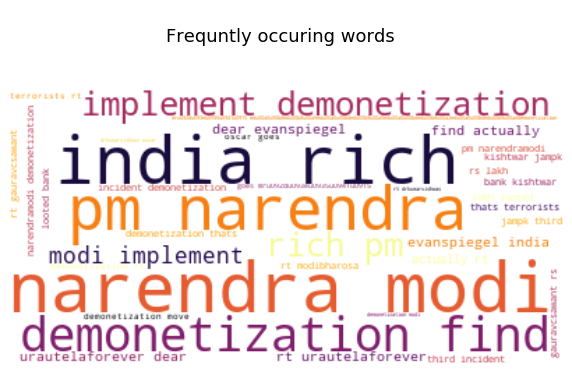

In [48]:
# word cloud for Frequently occuring words
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(max_font_size=90, max_words=50, background_color="white", colormap="inferno").generate(complete_text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('\nFrequntly occuring words  \n\n',fontsize=18)
plt.axis("off")
plt.show()